In [167]:
import pandas as pd
import numpy as np
import warnings
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [168]:
df=pd.read_csv('hr.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


We have 1470 rows and 35 columns

In [169]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Getting the unique values.

In [170]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [171]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the data.

In [172]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Looking at the data and the output variable, we can make an intution that the there are few columns which might not affect the attrition.Let us remove those data.

Emp count: As they only have one data which will not help us to get any information.

Over 18  : As they only have one data which will not help us to get any information.

Emp Num  : We can remove this columns as this do not affect the attrition in any manner.

Std hours: As they only have one data which will not help us to get any information.

In [173]:
df = df.drop("Over18", axis=1)
df = df.drop("EmployeeCount", axis=1)
df = df.drop("EmployeeNumber", axis=1)
df = df.drop("StandardHours", axis=1)

Removed unnecessary columns, will have to work with the data to get more details on the game.

In [174]:
cols=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

cat=['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus', 'OverTime']

num=['Age','DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

No     1233
Yes     237
Name: Attrition, dtype: int64


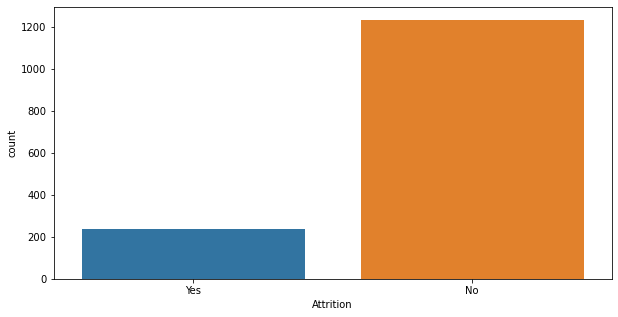

In [175]:
plt.figure(figsize=(10,5))
sns.countplot(df['Attrition'])
print(df['Attrition'].value_counts())

Out of 1470, 1233 did not leave the job whereas 237 left the job.

<AxesSubplot:xlabel='Age', ylabel='count'>

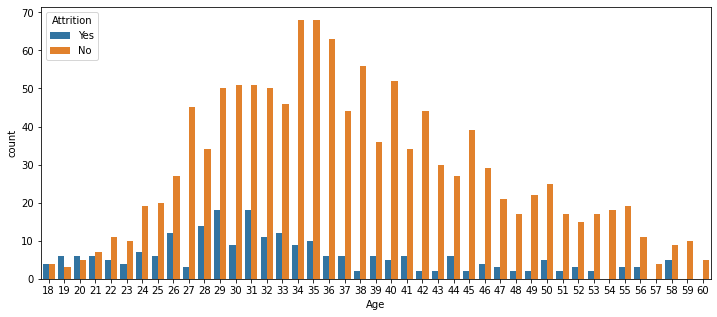

In [176]:
plt.subplots(figsize=(12,5))
sns.countplot(x='Age', hue='Attrition', data=df)

We are able to see here that for the age of 33-40, mostly the attrition is reducing. However most number of attrition is happenin in the age of 28-33

Comparing the cat plot to attrition to get the details on the reason for attrition.

No     1233
Yes     237
Name: Attrition, dtype: int64


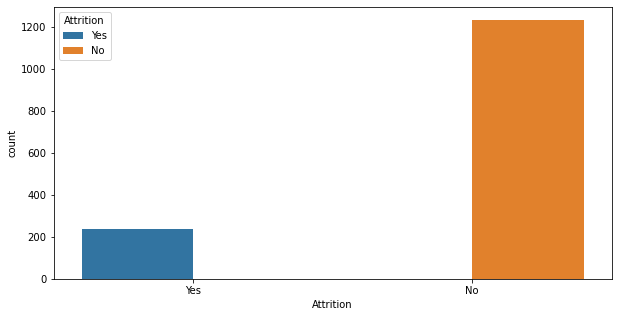

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


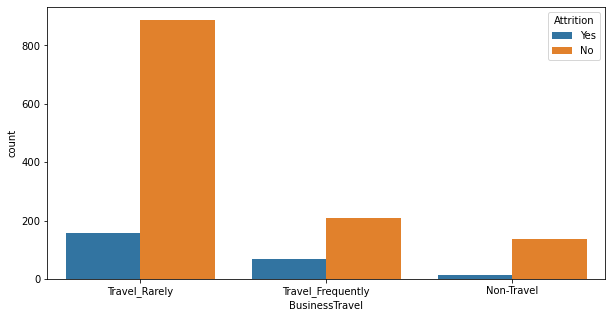

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


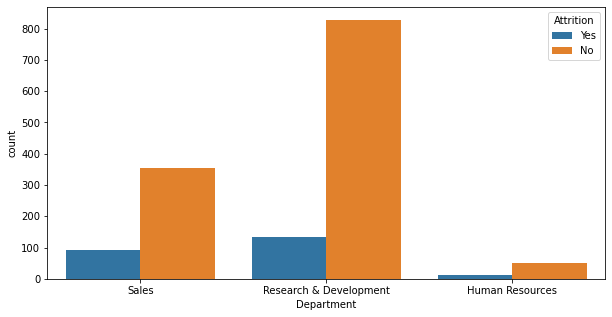

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


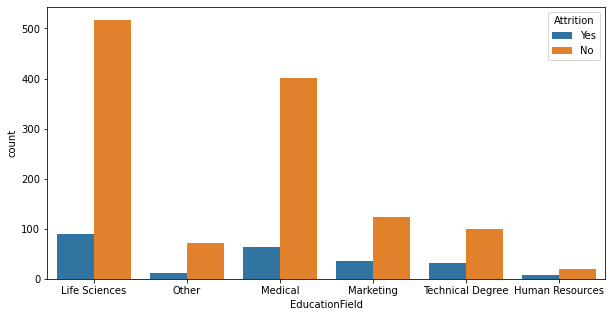

Male      882
Female    588
Name: Gender, dtype: int64


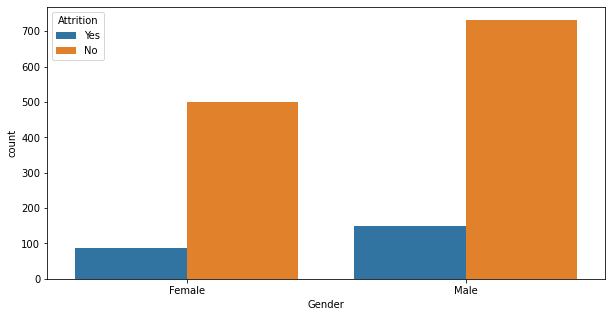

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


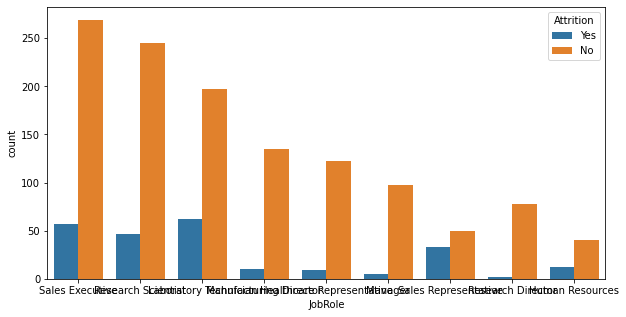

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


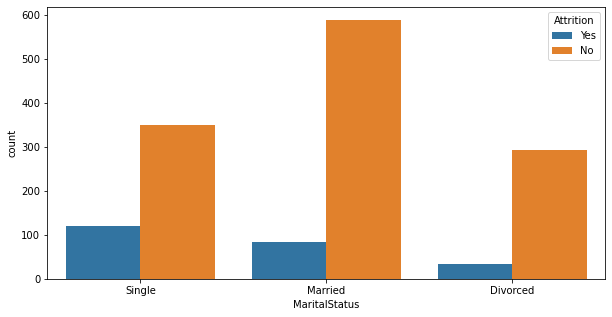

No     1054
Yes     416
Name: OverTime, dtype: int64


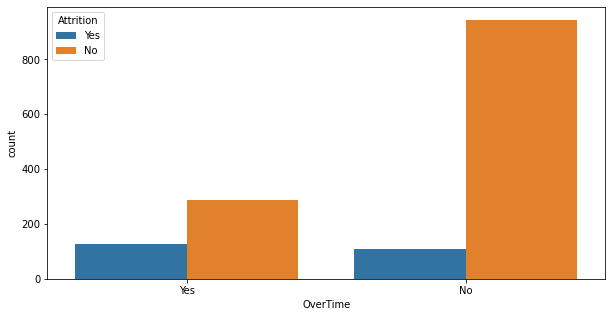

In [177]:
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, hue='Attrition', data=df)
    print(df[i].value_counts())
    plt.show()

1. We see here that most of the attrition is happening in the Research and Development Department and the least in Human resource.


2. People who travek rarely for business trips are more likely to leave.


3. Looking into the education field, we see here that most of the attrition is happening in Life Sciences and Medical. and comparatively less in HR and others.


4. Attrition is happening more in male, though we understand that the number of male is also more so if we look into the peecentage as well, female are more likely to leave.



5. Sales Executive, Research Scientist, Laboratory Technician are more likely to leave.



6. More likely single are like to make an attrition and divorced have very least probability that they leave the job.



7. Looking at the percetage of the number of people doing overtime and the people who leaves, the people who are doing Overtime are less and they too are likely to leave, those who are not doing an OT are least likely to leave.

The details of the number of count in each column is mentioned in the visualisation part.

Checking the age group of people doing overtime.

<Figure size 720x720 with 0 Axes>

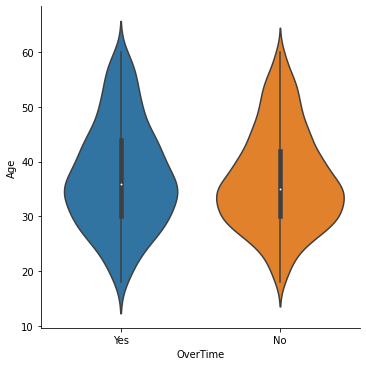

In [178]:
plt.figure(figsize=(10,10))
sns.catplot(x="OverTime", y="Age", kind="violin", data=df)

We are able to see here that from the age 25-30, the people doing overtime increases and decreases after an of 40+

Though the people who are not doing an over time remains the same as there is a decrease after 35+

Cheking the numerical plots with the attrition.

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


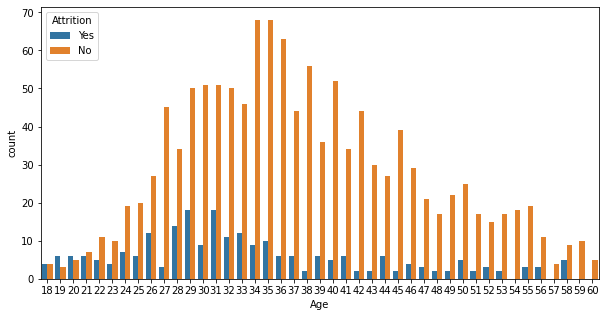

691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64


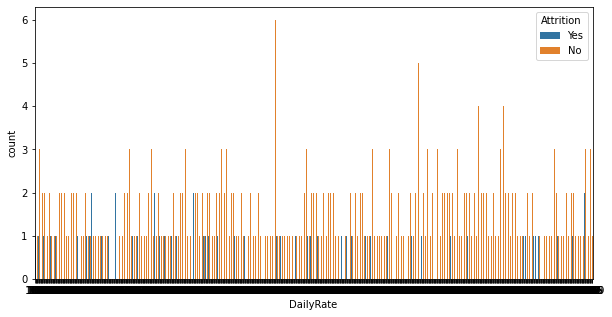

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
17     20
12     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


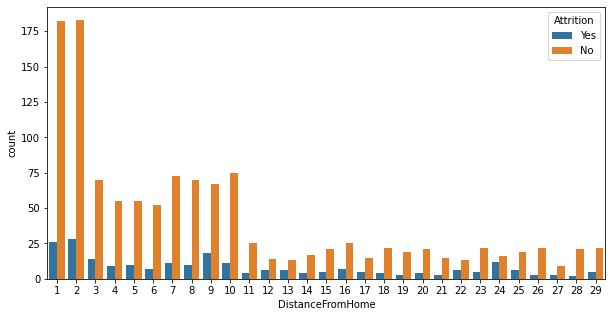

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


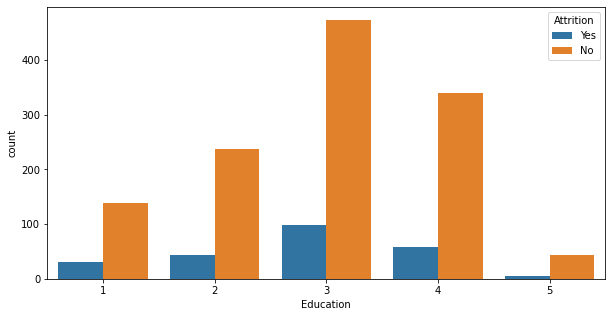

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


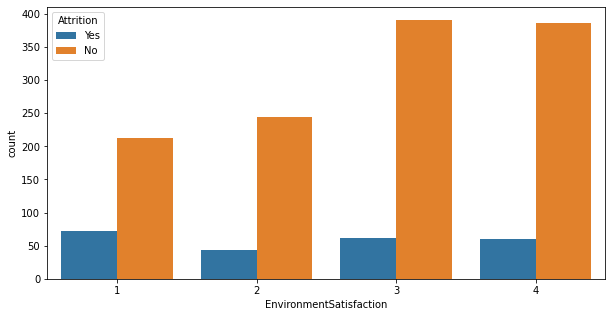

66    29
42    28
98    28
84    28
48    28
      ..
69    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64


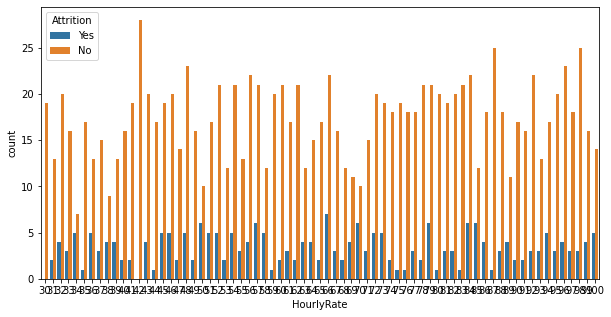

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


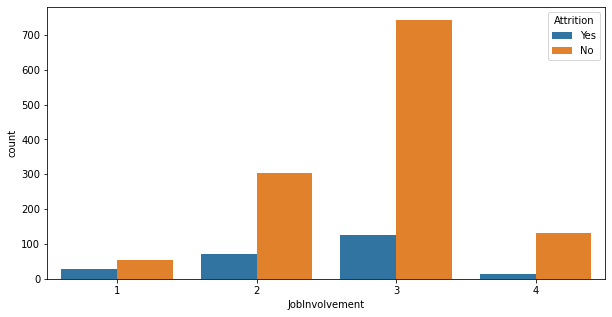

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


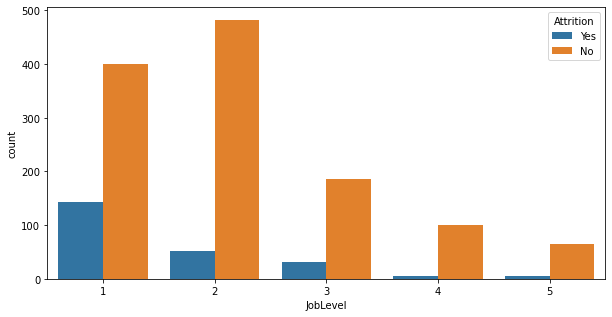

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


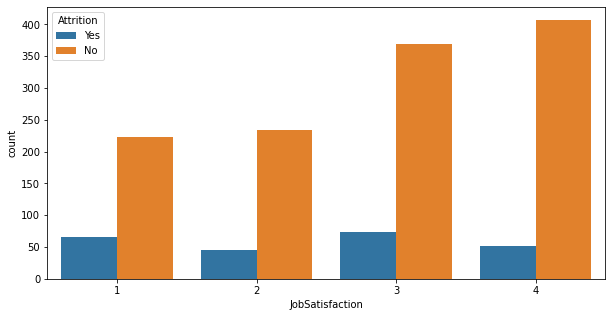

2342     4
6142     3
2610     3
2559     3
6347     3
        ..
4103     1
2705     1
6796     1
19717    1
10239    1
Name: MonthlyIncome, Length: 1349, dtype: int64


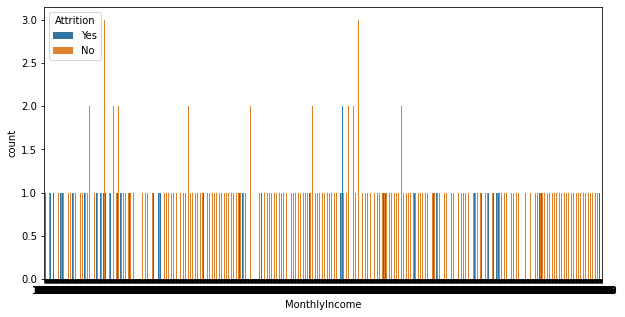

4223     3
9150     3
9096     2
13008    2
12858    2
        ..
17071    1
23213    1
3835     1
25258    1
12287    1
Name: MonthlyRate, Length: 1427, dtype: int64


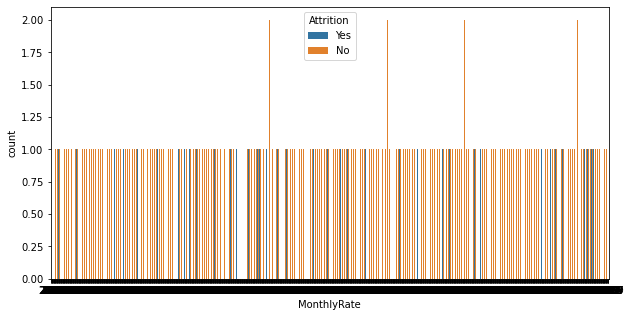

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


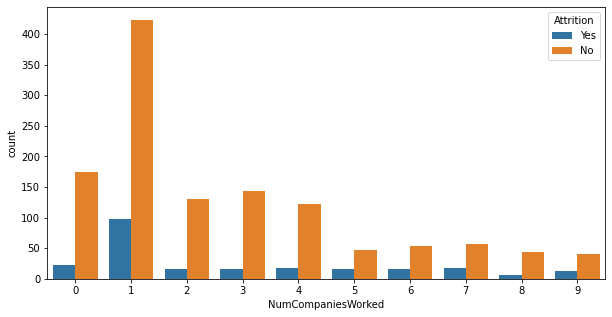

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


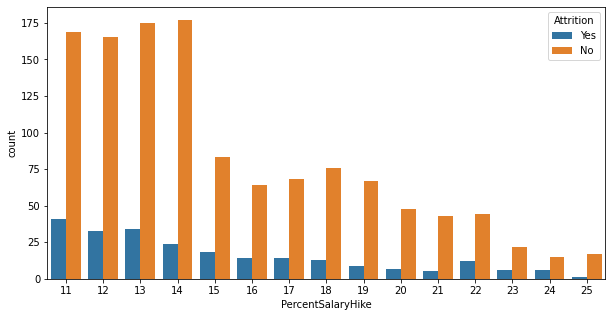

3    1244
4     226
Name: PerformanceRating, dtype: int64


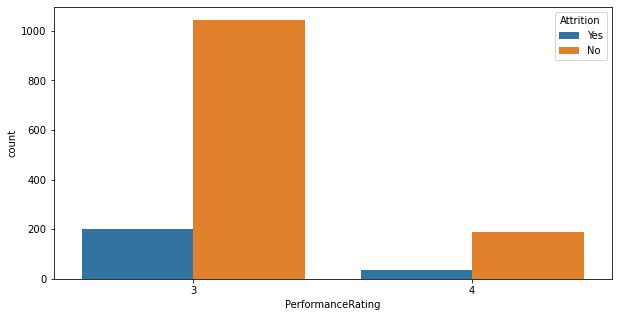

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


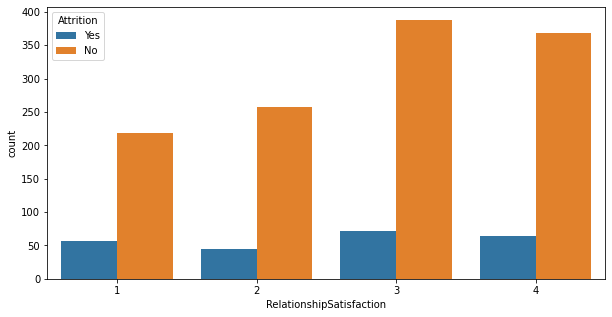

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


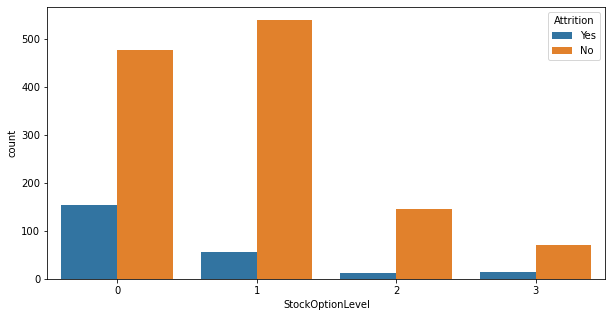

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


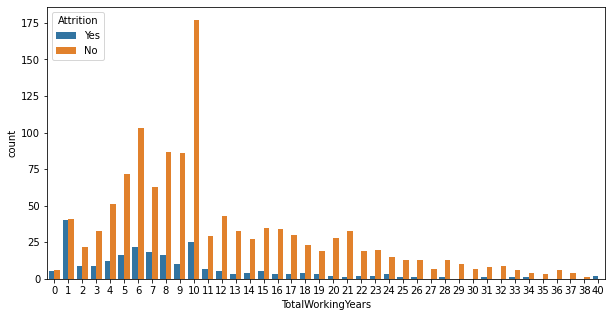

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


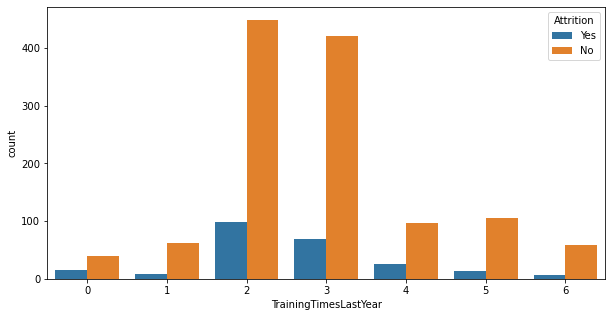

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


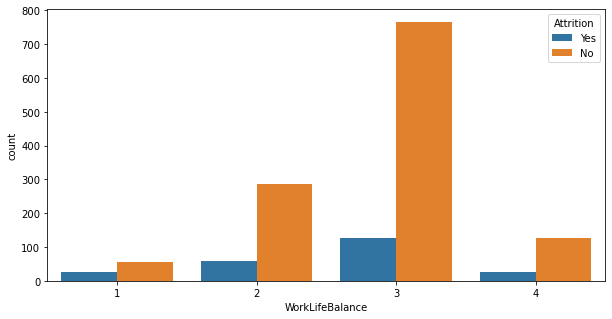

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
29      2
27      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64


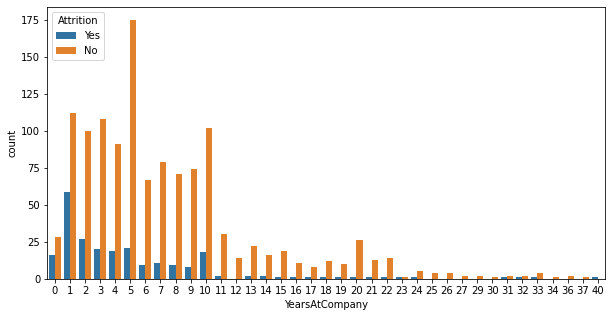

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


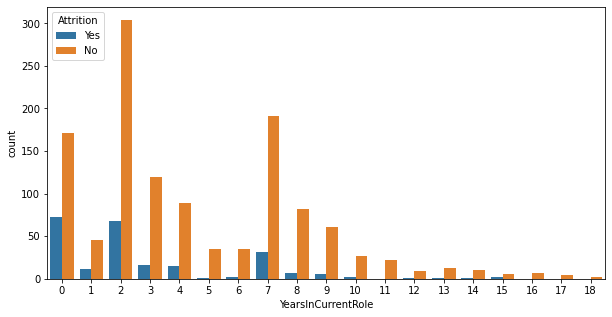

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


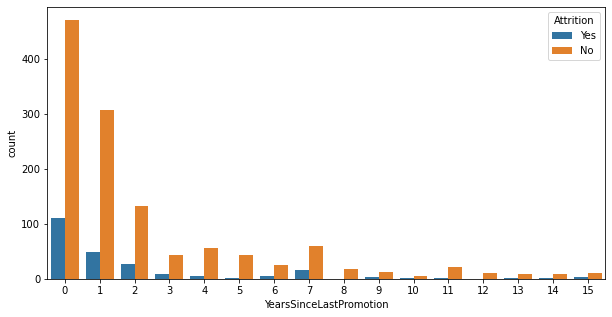

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64


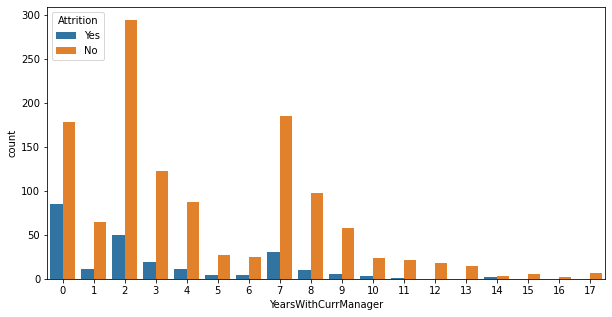

In [179]:
for i in num:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, hue='Attrition', data=df)
    print(df[i].value_counts())
    plt.show()

Looking into the intution:
    
1. With the increase in distance, the number of employees are less and the number of attrition percentage also goes up.


2. Education Level 3 is having more attrition compared to other levels.


3. Looks like attrition is not making much differnce here however we can infer that there is a small increase in attrition for satisfaction level 1.


4. Retention is more in Job involvement 3.


5. People in Joblevel 1 are likely to leave more compared to others.


6. More people who have worked in just 1 company are likey to leave.


7. We see a trend in percent salary hike as we see here that with the increment in hike, the percentage of people who stays increases.


8. With the increment in the performace rating, more people are likely to stay.


9. Relationship satisfaction has nothing much to infer from vissualisation.


10. With Stock option level 1, there is high chances that any person leaves.


11. The more the total working experience, the more will be chances that a person stays.


12. The employees who took training 2-3 times last year have chances to leave.


13. The more any employee stays in the company, there is a chance that the employee stays.


14. If there is no job role change in 0-3 years, there is a chance that the employee leaves.


15. Looking at the data of year since last promotion, we see here that there is a chance that the employee leaves before 0-1 year.


16. The more any employee is staying under a manager, there is a possibility that the employee stays.

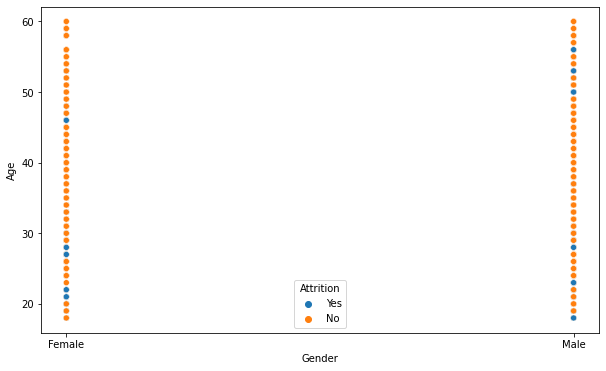

In [180]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Gender',y='Age',hue='Attrition')
plt.show()

We see here that with increase in age, there is a chanace that the Male employees leaves but vice versa with Female.



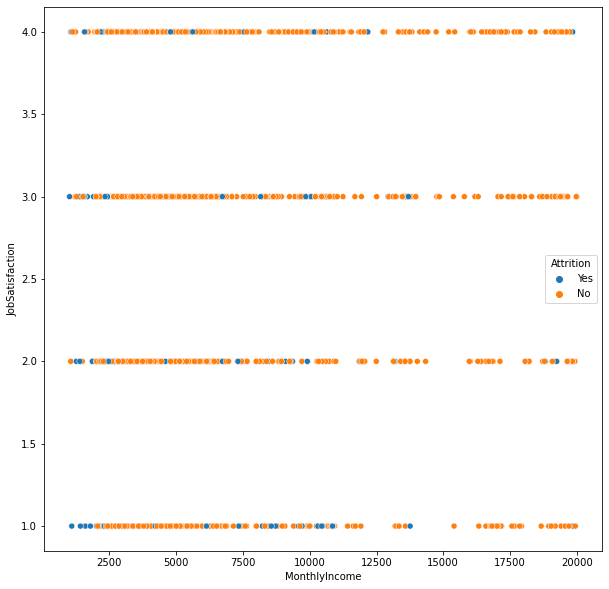

In [181]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='MonthlyIncome',y='JobSatisfaction',hue='Attrition')
plt.show()

Employees having low job satisfaction and low salary are more prone to leave however, the more the salary the less will be the attrition.

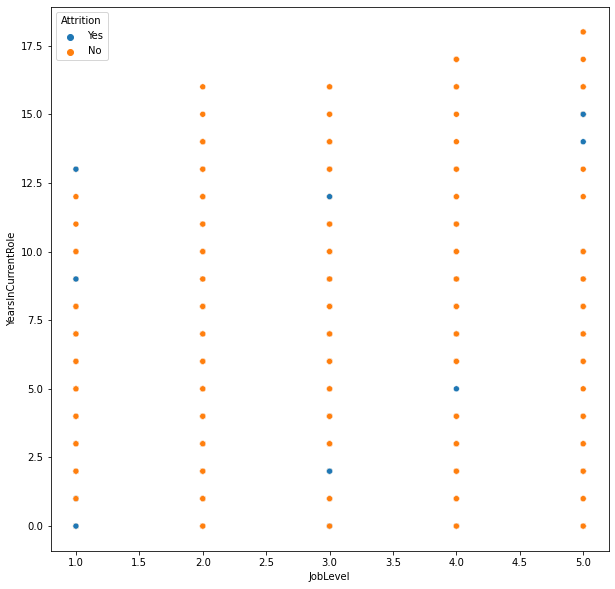

In [182]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='JobLevel',y='YearsInCurrentRole',hue='Attrition')
plt.show()

As per the details shown here we see that employees with job level 5 are leaving the company once they are in the current role for around 10-12 years.

Employess with job level 3 are having a chance that the leaves before completing 2 years in the current role.

And we also see here that the employees having job level 2 are likely to stay in the company longer than other job levels.

For job level 4, we see here that there are chances thata they leave once they completes around 5 years in the company.


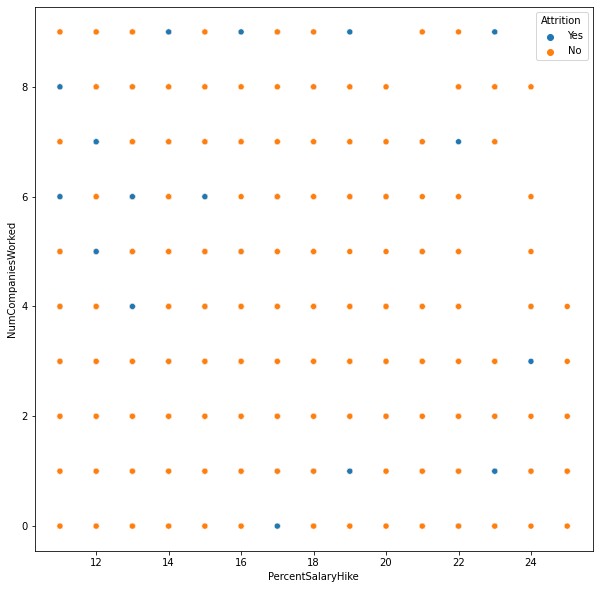

In [183]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df,x='PercentSalaryHike',y='NumCompaniesWorked',hue='Attrition')
plt.show() 

Members having more than 24% hike are likely to stay.

If the number of hike is less than 12% and if the employee has worked in more than 5 companies, there is a chance that they leaves.

Correlation

Checking for correlation in the numerical columns.

<AxesSubplot:>

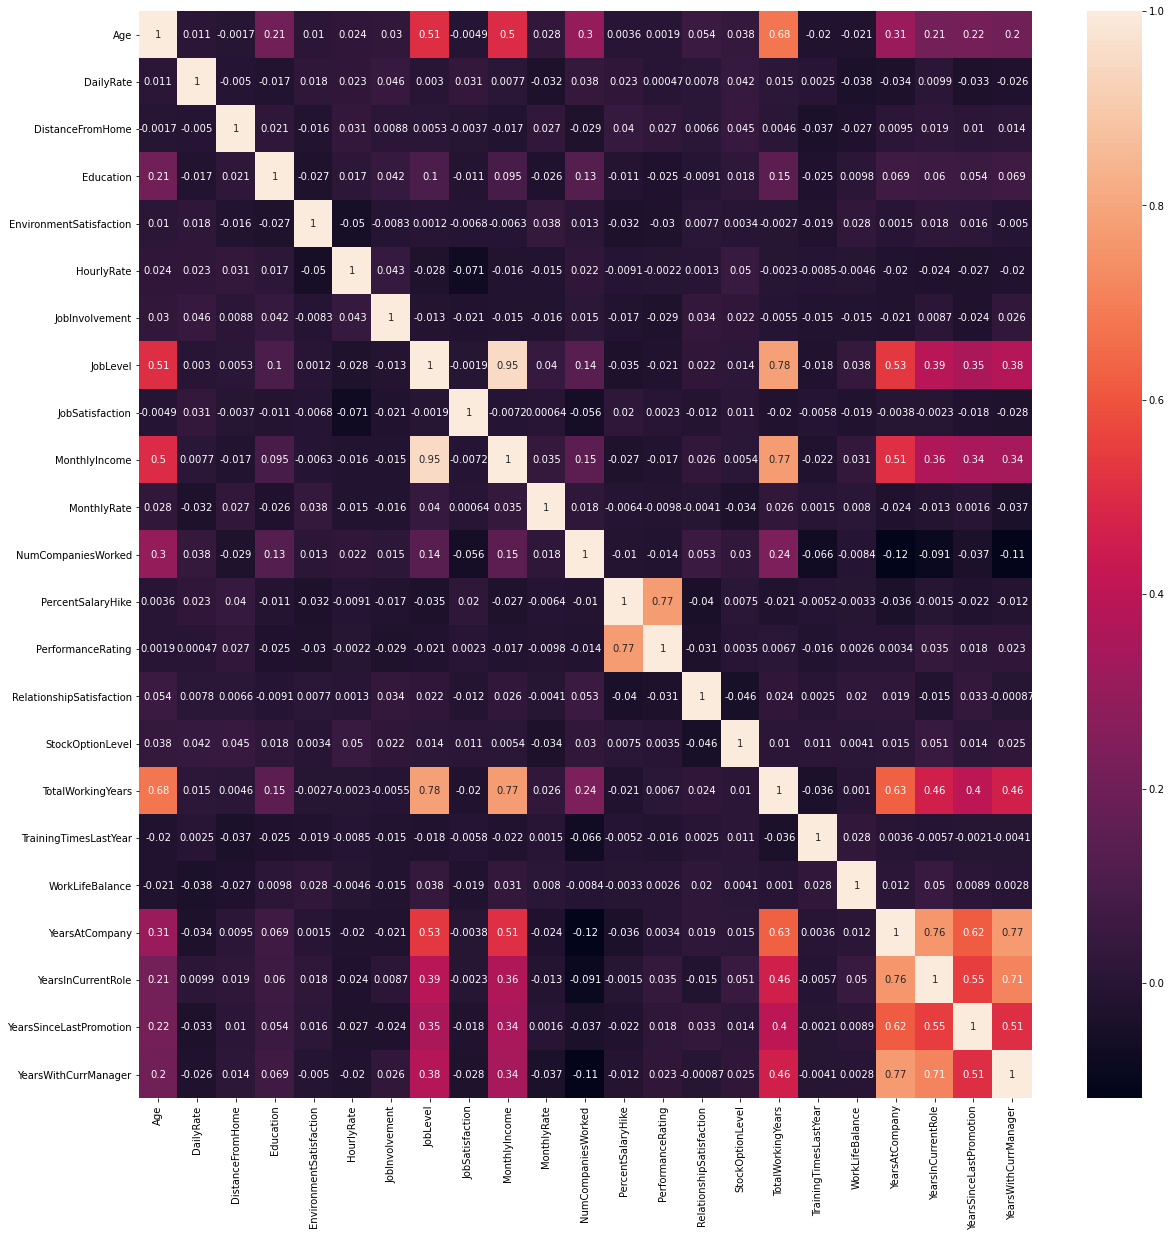

In [184]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

Years in company, Years in Current role, Year since last promotion ad Years with curr manager is highly correlated with each other.

Salary hike and performance is correlated with each other.

Job level and Monthly income is correlated with each other.

Job level and monthly income goes up with the number of working years.

Years in company, Years in Current role, Year since last promotion ad Years with curr manager is also correlated with monthly income and job level

In [185]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There is a considerable std dev in Daily rate, Hourly rate, monthly income,

We are able to see here that there are few probable outliers here in the data which can be checked in detail later on.

Encodig the data

In [186]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [187]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [188]:
df.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

Here, Attrition, YES will be 1 and NO will be 0.

Checking for boxplot.

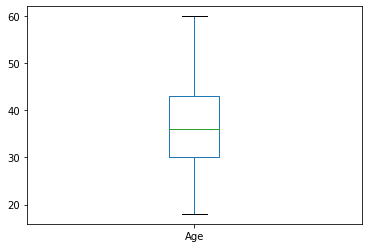

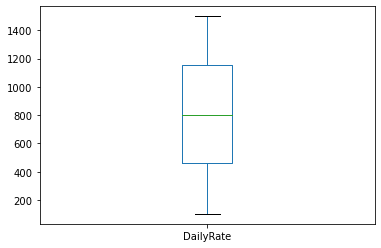

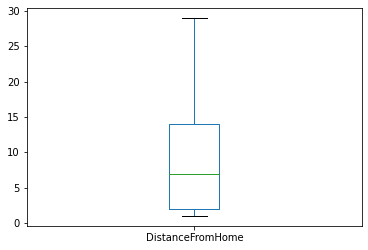

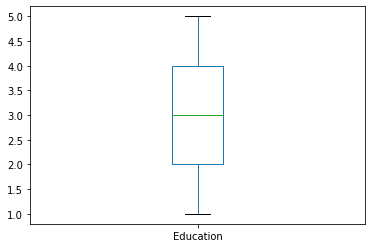

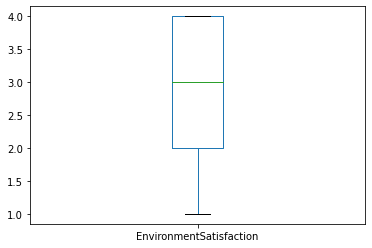

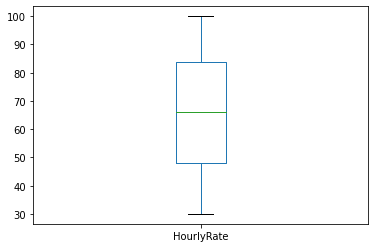

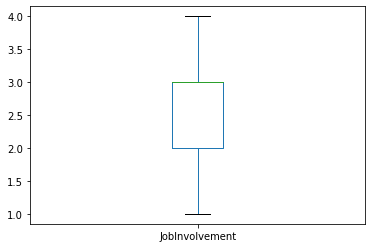

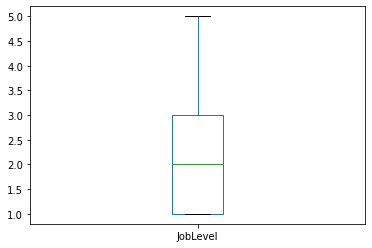

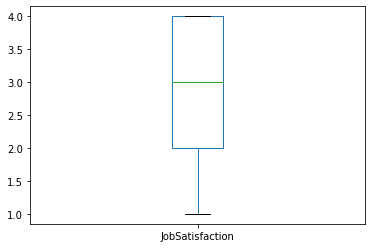

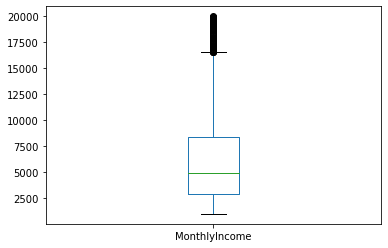

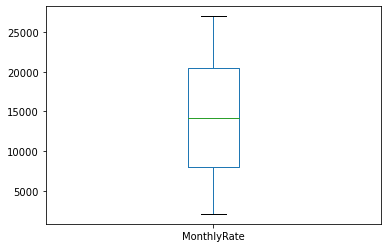

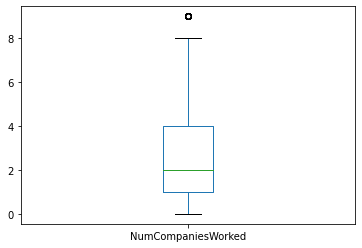

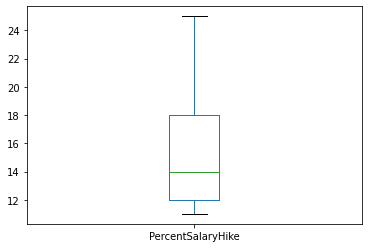

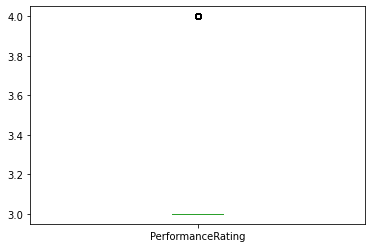

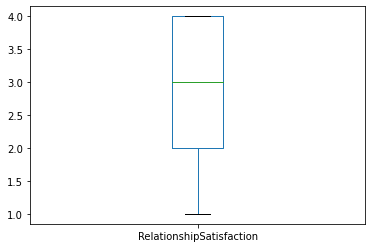

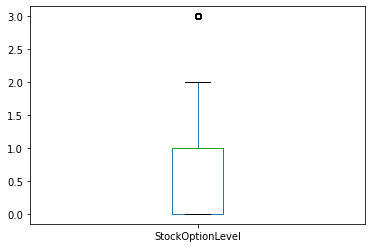

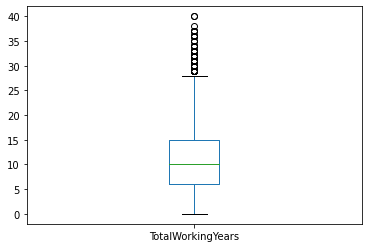

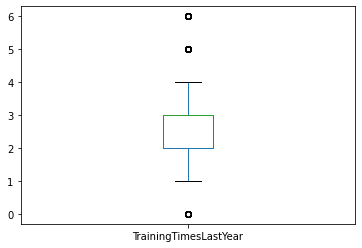

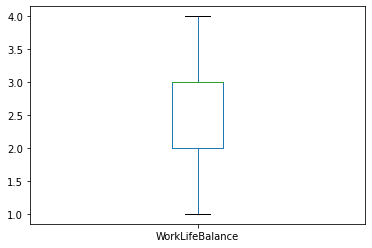

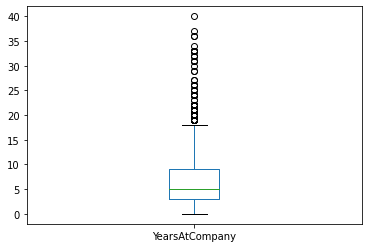

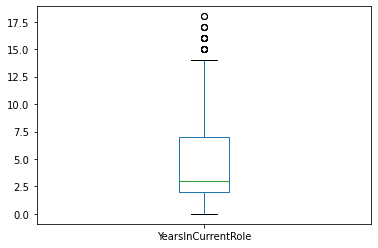

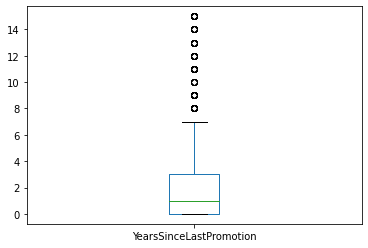

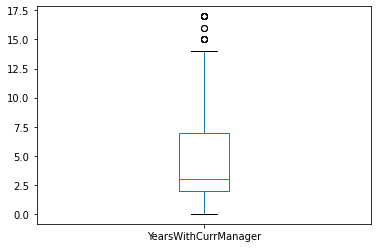

In [189]:
for i in num:
    df[i].plot.box()
    plt.show()

We arae able to see some outliers in Total working years,training times,year with current manager etc, more details we will check using z score.

In [190]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

There are a few ouliers.

In [191]:
dfn = df[(z<3).all(axis = 1)]
print(df.shape)
print(dfn.shape)

(1470, 31)
(1387, 31)


In [192]:
# percentage of data loss.
data_loss = ((1470-1387)/1470)*100
data_loss

5.646258503401361

As the daata loss is around 5-6 % we can afford to remoove them.


Splitting the data to do further processing

In [193]:
x=dfn.drop(columns='Attrition')
y=dfn['Attrition']

In [194]:
x.shape

(1387, 30)

In [195]:
y.shape

(1387,)

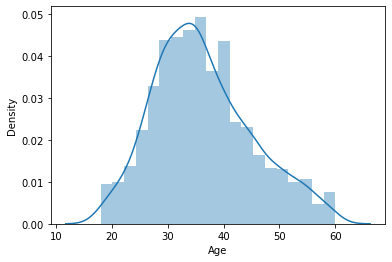

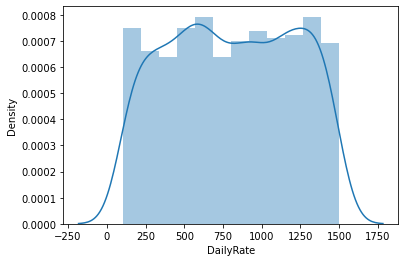

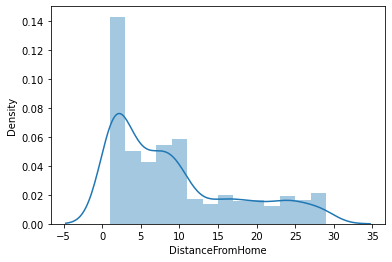

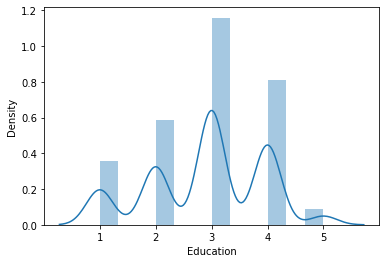

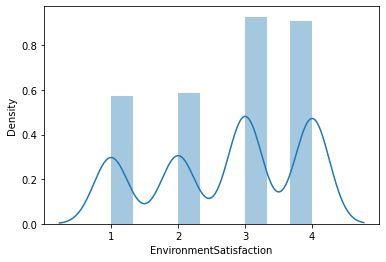

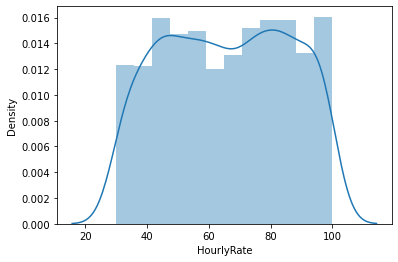

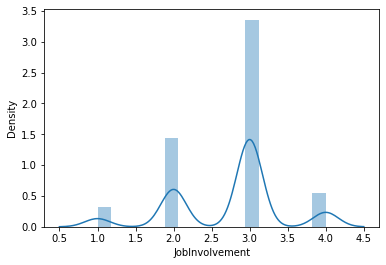

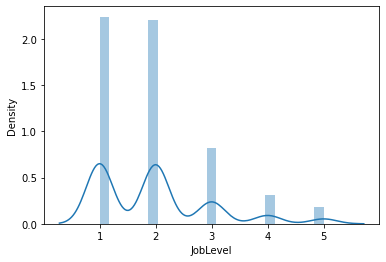

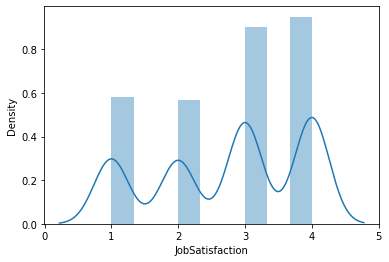

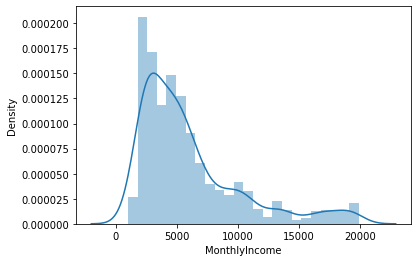

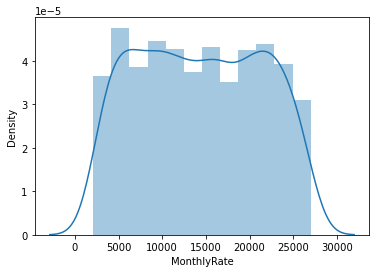

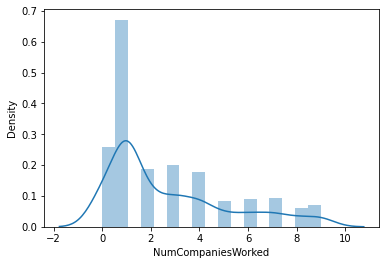

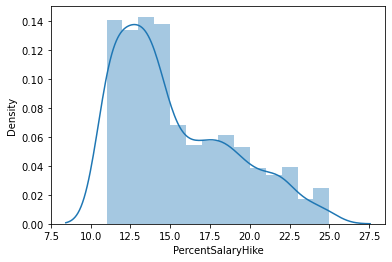

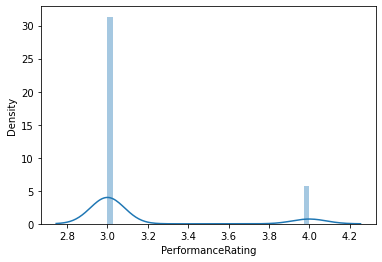

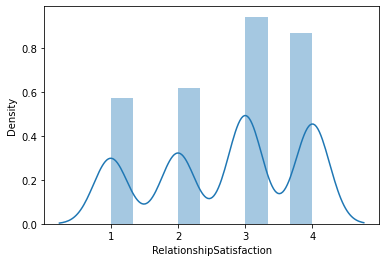

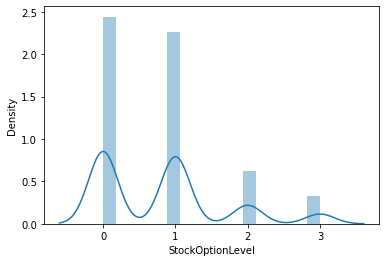

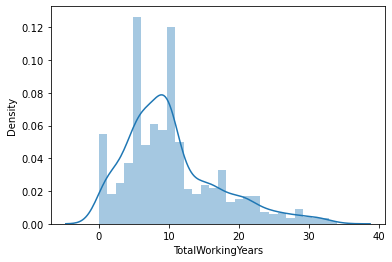

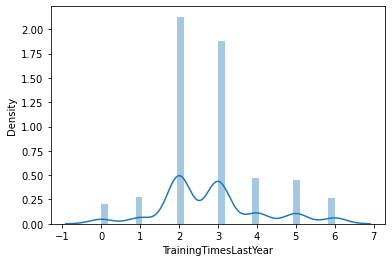

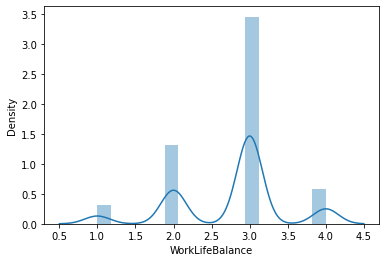

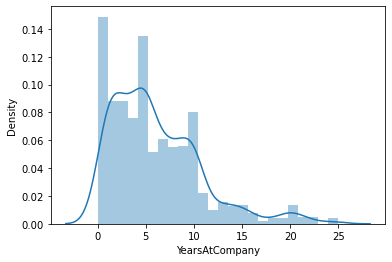

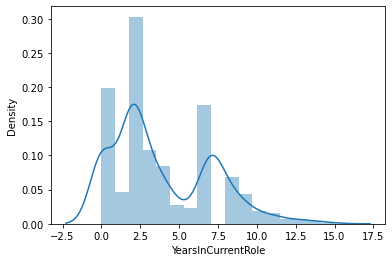

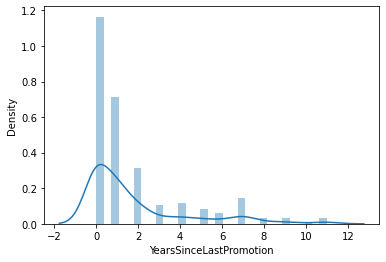

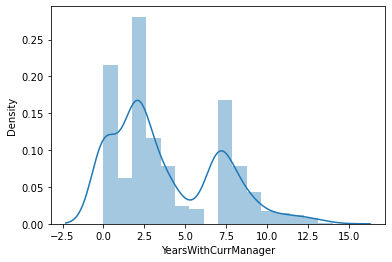

In [196]:
for i in num:
    plt.figure()
    sns.distplot(x[i])

We are able to see that there is a skewness in few of the columns like Job involvement, Joblevel, Monthly income, companies worked, performance rating, stock option level, total working years, years at company, etc., to get further details we will use the skew command

In [197]:
x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

Considering 0.5 to -0.5 as the benchmark, we see here that there are few columns which are having skewness, using power transform to reomve the skewness.

In [198]:
cl=['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [199]:
from sklearn.preprocessing import PowerTransformer
pwr=PowerTransformer(method='yeo-johnson')
x=pwr.fit_transform(x)
x=pd.DataFrame(x,columns=cl)

In [200]:
x.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

Unable to remove the skewness in the data and hence will try to reduce the variance in the test data later on.

Standardising.

In [201]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

x = pd.DataFrame(x, columns = cl)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,0.638730,0.750615,1.379881,-1.489968,-0.902402,-0.965129,-0.712215,-1.229911,1.359498,...,0.0,-1.524369,-1.084263,-0.173231,-2.608524,-2.147950,0.231837,0.290524,-1.073534,0.582177
1,1.371830,-1.380776,-1.343372,-0.473500,0.244561,-1.759177,-0.965129,0.204826,0.813067,-0.208763,...,0.0,1.235448,0.548653,0.147620,0.217074,0.274860,0.948319,1.006575,0.193168,1.018073
2,0.182486,0.638730,1.337080,-0.473500,-1.028366,-0.902402,1.239552,1.210036,0.813067,1.267832,...,0.0,-0.690386,-1.084263,-0.351153,0.217074,0.274860,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,-1.380776,1.377080,-0.473500,-0.698191,1.102042,-0.965129,1.210036,-1.229911,-0.458919,...,0.0,0.235192,-1.084263,-0.173231,0.217074,0.274860,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,0.638730,-0.467301,-0.473500,-1.028366,-1.759177,0.689982,-1.522916,0.813067,-1.290538,...,0.0,1.235448,0.548653,-0.544046,0.217074,0.274860,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.069696,-1.380776,0.252885,-0.473500,1.408969,-0.902402,0.689982,0.204826,0.813067,-1.236937,...,0.0,0.235192,0.548653,1.039364,0.217074,0.274860,0.003289,-0.390769,-1.073534,0.018680
1383,0.400794,0.638730,-0.410602,-0.473500,-0.049519,-1.759177,0.689982,1.210036,0.813067,-1.183579,...,0.0,-1.524369,0.548653,-0.007630,1.606919,0.274860,0.436162,1.006575,0.193168,1.018073
1384,-1.080489,0.638730,-1.754538,-0.473500,-0.440553,0.057451,-0.965129,-0.712215,0.813067,1.036990,...,0.0,-0.690386,0.548653,-0.544046,-2.608524,0.274860,0.231837,-0.390769,-1.073534,0.018680
1385,1.371830,-1.380776,0.573286,1.379881,-1.028366,0.057451,0.689982,1.210036,0.813067,-0.109795,...,0.0,1.235448,-1.084263,1.039364,0.217074,-1.112829,0.791264,0.793764,-1.073534,1.205782


Standardised the dataa as there were many variations in the data especially in the incomes and experience.

In [202]:
x.shape

(1387, 30)

## Modelling

In [203]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.30,random_state=25)

Not using for loop for test and random state as we usually work on getting the best random state and use that for other models as well, however there is a possibility the the random value chanage with the model we use to get the best random state or test size hence not using that and assuming mostly used 30 7- split for test and a random value for random state as I presume that it might not bring a big difference in the data.

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [240]:
lr = LogisticRegression()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()

In [241]:
model=[lr,knc,dtc,svc,rf,ada]
for m in model:
    print('The model is: ',m)
    m.fit(x_train,y_train)
    predict=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
    print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
    print('Calssification Report is: ',classification_report(y_test,predict))
    print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
    print('\n\n')

The model is:  LogisticRegression()
Accuracy score for the training :  0.8886597938144329
Accuracy score for the model is:  0.8633093525179856
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       344
         1.0       0.65      0.48      0.55        73

    accuracy                           0.86       417
   macro avg       0.77      0.71      0.74       417
weighted avg       0.85      0.86      0.85       417

Confusion Matrix is:  [[325  19]
 [ 38  35]]



The model is:  KNeighborsClassifier()
Accuracy score for the training :  0.8752577319587629
Accuracy score for the model is:  0.8345323741007195
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       344
         1.0       0.64      0.12      0.21        73

    accuracy                           0.83       417
   macro avg       0.74      0.55      0.56       417
weighted av

In [242]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
model = [lr, knc, dtc, svc, rf, ada]
for m in model:
    print('The model is: \n',m)
    for j in range (2,10):
        train_accuracy = accuracy_score(y_train, pred_train)
        test_accuracy = accuracy_score(y_test, predict)
        cv_score = cross_val_score(m, x, y, cv = j)
        cv_mean = cv_score.mean()
        print(f'At cross fold {j} the cv score is {cv_mean}')
        print('\n\n')

The model is: 
 LogisticRegression()
At cross fold 2 the cv score is 0.8644503911074516



At cross fold 3 the cv score is 0.8723831963572785



At cross fold 4 the cv score is 0.8695070047142309



At cross fold 5 the cv score is 0.8695036750383087



At cross fold 6 the cv score is 0.8702169478031547



At cross fold 7 the cv score is 0.8759743885372027



At cross fold 8 the cv score is 0.8709305029566141



At cross fold 9 the cv score is 0.8702043476237024



The model is: 
 KNeighborsClassifier()
At cross fold 2 the cv score is 0.8421036216425266



At cross fold 3 the cv score is 0.8421019824907514



At cross fold 4 the cv score is 0.8464293448385002



At cross fold 5 the cv score is 0.8478741916214322



At cross fold 6 the cv score is 0.8485905856595511



At cross fold 7 the cv score is 0.844264613108834



At cross fold 8 the cv score is 0.8464304697362302



At cross fold 9 the cv score is 0.8449844062747288



The model is: 
 DecisionTreeClassifier()
At cross fold 2 the 

Looking at the above data, Logistic regression is giving the best accuracy:
    
    Testing = 86.3
    
    Testing at cv=2 is 86.4
    
    Training = 88.8

AUC ROC curve

In [243]:
from sklearn.metrics import roc_curve,roc_auc_score

In [244]:
y_predprob=lr.predict_proba(x_test)[:,1]  #[:,1] is used to get the target values which are at 1.

In [245]:
fpr,tpr,thresholds=roc_curve(y_test,y_predprob)

In [246]:
fpr

array([0.        , 0.        , 0.        , 0.00290698, 0.00290698,
       0.00581395, 0.00581395, 0.00872093, 0.00872093, 0.01453488,
       0.01453488, 0.01744186, 0.01744186, 0.02034884, 0.02034884,
       0.02325581, 0.02325581, 0.02906977, 0.02906977, 0.03197674,
       0.03197674, 0.03488372, 0.03488372, 0.04360465, 0.04360465,
       0.04651163, 0.04651163, 0.05523256, 0.05523256, 0.05813953,
       0.05813953, 0.06686047, 0.06686047, 0.06976744, 0.06976744,
       0.07267442, 0.07267442, 0.07848837, 0.07848837, 0.08430233,
       0.08430233, 0.09593023, 0.09593023, 0.10174419, 0.10174419,
       0.11627907, 0.11627907, 0.125     , 0.125     , 0.15697674,
       0.15697674, 0.1627907 , 0.1627907 , 0.1744186 , 0.1744186 ,
       0.18313953, 0.18313953, 0.19767442, 0.19767442, 0.20930233,
       0.20930233, 0.23546512, 0.23546512, 0.24709302, 0.24709302,
       0.28197674, 0.28197674, 0.2994186 , 0.2994186 , 0.35174419,
       0.35174419, 0.43895349, 0.43895349, 0.45930233, 0.45930

In [247]:
tpr

array([0.        , 0.01369863, 0.15068493, 0.15068493, 0.16438356,
       0.16438356, 0.20547945, 0.20547945, 0.23287671, 0.23287671,
       0.24657534, 0.24657534, 0.28767123, 0.28767123, 0.30136986,
       0.30136986, 0.32876712, 0.32876712, 0.34246575, 0.34246575,
       0.38356164, 0.38356164, 0.4109589 , 0.4109589 , 0.42465753,
       0.42465753, 0.45205479, 0.45205479, 0.47945205, 0.47945205,
       0.49315068, 0.49315068, 0.50684932, 0.50684932, 0.54794521,
       0.54794521, 0.56164384, 0.56164384, 0.57534247, 0.57534247,
       0.5890411 , 0.5890411 , 0.60273973, 0.60273973, 0.61643836,
       0.61643836, 0.64383562, 0.64383562, 0.68493151, 0.68493151,
       0.69863014, 0.69863014, 0.71232877, 0.71232877, 0.7260274 ,
       0.7260274 , 0.73972603, 0.73972603, 0.75342466, 0.75342466,
       0.76712329, 0.76712329, 0.78082192, 0.78082192, 0.79452055,
       0.79452055, 0.80821918, 0.80821918, 0.82191781, 0.82191781,
       0.84931507, 0.84931507, 0.8630137 , 0.8630137 , 0.87671

In [248]:
thresholds


array([1.97163284e+00, 9.71632839e-01, 8.62923246e-01, 8.52827276e-01,
       8.30008409e-01, 8.16984632e-01, 7.55727218e-01, 7.38934046e-01,
       7.29188085e-01, 7.13285602e-01, 7.13005500e-01, 7.11270600e-01,
       7.06379643e-01, 6.98554296e-01, 6.94329446e-01, 6.45688122e-01,
       6.42056572e-01, 6.22329715e-01, 6.21008590e-01, 6.09651779e-01,
       5.81028524e-01, 5.80503106e-01, 5.75150913e-01, 5.38481726e-01,
       5.31795564e-01, 5.27516189e-01, 5.19291855e-01, 5.03811185e-01,
       5.00607884e-01, 4.77505816e-01, 4.72547559e-01, 4.53475276e-01,
       4.48945780e-01, 4.43477361e-01, 4.36501816e-01, 4.33163798e-01,
       4.29254850e-01, 4.14088788e-01, 4.13476834e-01, 4.01516534e-01,
       3.95841571e-01, 3.81180863e-01, 3.68186825e-01, 3.60132748e-01,
       3.52982145e-01, 3.20921458e-01, 3.19933572e-01, 3.08200399e-01,
       3.03549628e-01, 2.61355625e-01, 2.55460998e-01, 2.49579007e-01,
       2.49529904e-01, 2.41588555e-01, 2.38131195e-01, 2.33492191e-01,
      

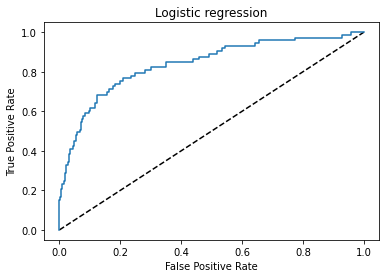

In [249]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression')
plt.show()

In [250]:
Auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [256]:
Auc_score

0.7121097483274927

## Grid Search

In [258]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv=GridSearchCV(lr,grid,cv=2)
logreg_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.8680412371134021


In [261]:
lr=LogisticRegression(C=1 ,penalty='l2' )

In [262]:
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
predlr = lr.predict(x_test)
data = [predlr, y_test]
pd.DataFrame(data, index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,407,408,409,410,411,412,413,414,415,416
Predicted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Actual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [263]:
print('Errors:')
print('\n')
print('Accuracy score for the training : ',accuracy_score(y_train,pred_train))
print('Accuracy score for the model is: ',accuracy_score(y_test,predict))
print('Calssification Report is: ',classification_report(y_test,predict))
print('Confusion Matrix is: ',confusion_matrix(y_test,predict))
print('\n\n')

Errors:


Accuracy score for the training :  0.911340206185567
Accuracy score for the model is:  0.8585131894484412
Calssification Report is:                precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       344
         1.0       0.67      0.38      0.49        73

    accuracy                           0.86       417
   macro avg       0.77      0.67      0.70       417
weighted avg       0.84      0.86      0.84       417

Confusion Matrix is:  [[330  14]
 [ 45  28]]





## Saving the model

In [265]:
joblib.dump(lr, 'hrlr.obj')

['hrlr.obj']